In [1]:
import BNewmark_DS_GR2_2023_02 as BN
import matplotlib.pyplot as plt

EspectrosdeRespuesta. 
Los espectros de respuesta de aceleración, velocidad o desplazamiento, se emplean de acuerdo al tipo de análisis estructural que se realiza y a la filosofía de diseño que se emplee.

<function matplotlib.pyplot.show(close=None, block=None)>

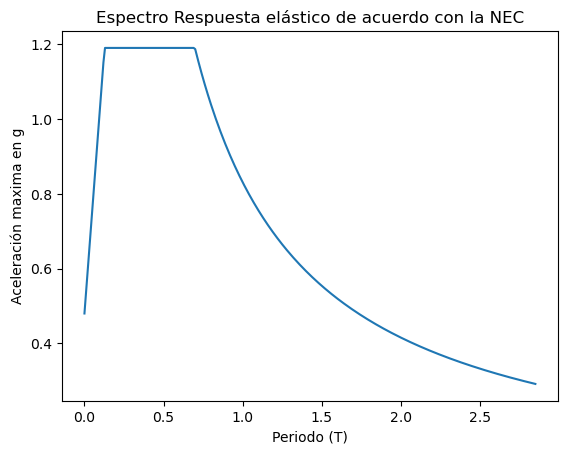

In [5]:
'''
Para diseño basado en fuerzas DBF.
'''

n = 2.48
z = 0.4      #Para un TR475 años
I = 1
fa = 1.2
fd = 1.19
fs = 1.28
r = 1
R = 8
fip = 0.9
fie = 0.9
g = 9.81
I = 1
fip_ASCE = 1
fie_ASCE = 1

Spec, Tmp = BN.Spec_NEC(n, z, fa, fd, fs, r, I, R)

plt.plot(Tmp, Spec)
plt.title('Espectro Respuesta elástico de acuerdo con la NEC')
plt.xlabel('Periodo (T)')
plt.ylabel('Aceleración maxima en g')
plt.show
